<a href="https://colab.research.google.com/github/shreyash-alt/MARS-RL-Assignment-2025/blob/main/Q-Table%20Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q Table Heatmap**

Episode 100, Avg Reward (last 100): 0.02, Epsilon: 0.905
Episode 200, Avg Reward (last 100): 0.03, Epsilon: 0.819
Episode 300, Avg Reward (last 100): 0.12, Epsilon: 0.741
Episode 400, Avg Reward (last 100): 0.23, Epsilon: 0.670
Episode 500, Avg Reward (last 100): 0.30, Epsilon: 0.606
Episode 600, Avg Reward (last 100): 0.25, Epsilon: 0.549
Episode 700, Avg Reward (last 100): 0.29, Epsilon: 0.496
Episode 800, Avg Reward (last 100): 0.42, Epsilon: 0.449
Episode 900, Avg Reward (last 100): 0.44, Epsilon: 0.406
Episode 1000, Avg Reward (last 100): 0.63, Epsilon: 0.368
Episode 1100, Avg Reward (last 100): 0.54, Epsilon: 0.333
Episode 1200, Avg Reward (last 100): 0.70, Epsilon: 0.301
Episode 1300, Avg Reward (last 100): 0.71, Epsilon: 0.272
Episode 1400, Avg Reward (last 100): 0.68, Epsilon: 0.246
Episode 1500, Avg Reward (last 100): 0.78, Epsilon: 0.223
Episode 1600, Avg Reward (last 100): 0.73, Epsilon: 0.202
Episode 1700, Avg Reward (last 100): 0.80, Epsilon: 0.183
Episode 1800, Avg Rewar

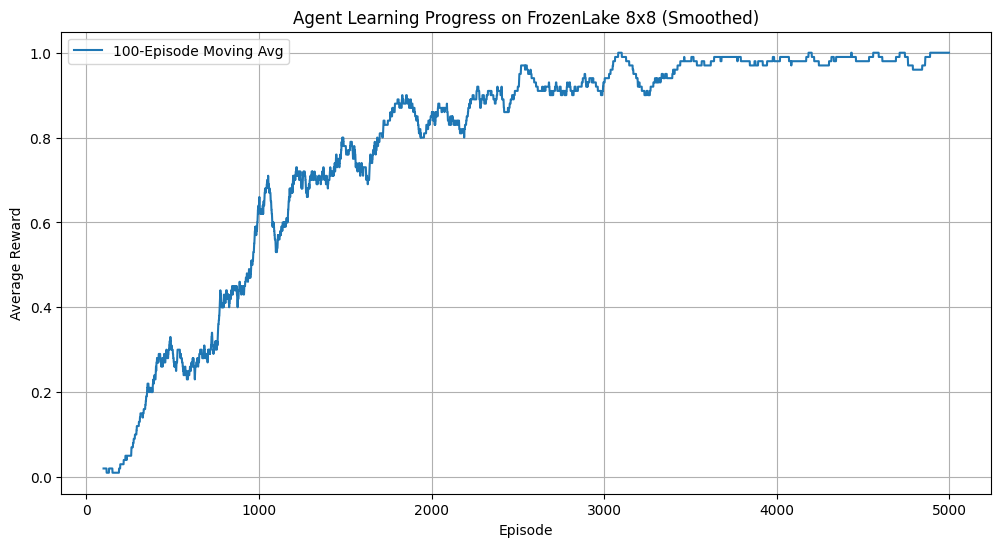

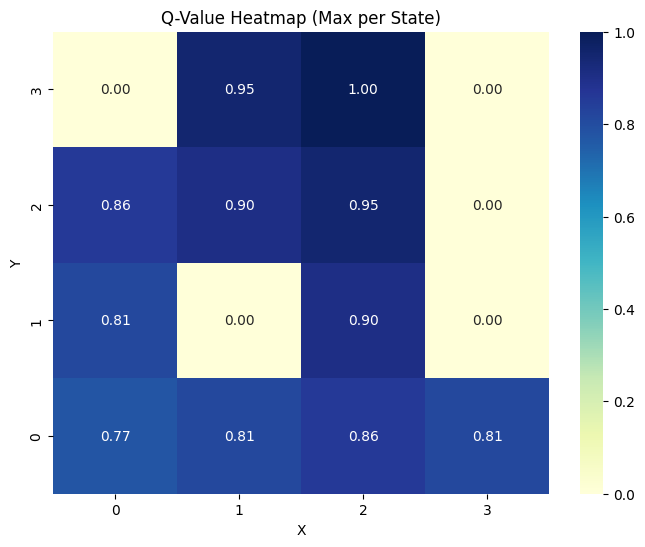

In [4]:
import numpy as np
import pandas as pd
import gymnasium as gym
import matplotlib.pyplot as plt
from time import sleep
import seaborn as sns


env = gym.make("FrozenLake-v1", is_slippery=False)
n_states = env.observation_space.n
n_actions = env.action_space.n


Q = np.zeros((n_states, n_actions))

alpha = 0.8
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.999
epsilon_min = 0.01
episodes = 5000
max_steps = 200  # a bit longer for 8x8

rewards_per_episode = []

for ep in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Epsilon-greedy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Q update
        Q[state, action] += alpha * (reward + gamma * np.max(Q[new_state]) - Q[state, action])
        state = new_state
        total_reward += reward

        if done:
            break

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards_per_episode.append(total_reward)

    # Logging
    if (ep + 1) % 100 == 0:
        avg = np.mean(rewards_per_episode[-100:])
        print(f"Episode {ep + 1}, Avg Reward (last 100): {avg:.2f}, Epsilon: {epsilon:.3f}")


plt.figure(figsize=(12, 6))
rolling_avg = pd.Series(rewards_per_episode).rolling(100).mean()
plt.plot(rolling_avg, label='100-Episode Moving Avg')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Agent Learning Progress on FrozenLake 8x8 (Smoothed)')
plt.grid(True)
plt.legend()
plt.show()


def plot_q_heatmap(q_table, title="Q-Value Heatmap (Max per State)"):
    grid_size = 4
    max_q = np.max(q_table, axis=1).reshape(grid_size, grid_size)

    plt.figure(figsize=(8, 6))
    sns.heatmap(max_q, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.gca().invert_yaxis()
    plt.show()

plot_q_heatmap(Q)
